In [1]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

from utils import *

data = {}

## Question 1

In [2]:
def linear_SVM(data):
    # 1. Create an instance of SVM with linear kernel, name it clf
    # 2. Train the SVM with x_train and y_train in data
    # 3. Make prediction y_pred, for x_pred with the trained model
    clf = svm.LinearSVC()
    clf.fit(data["x_train"], data["y_train"])
    y_pred = clf.predict(data["x_pred"])

    plot_data_decision_function(data, y_pred, clf)

## Question 2

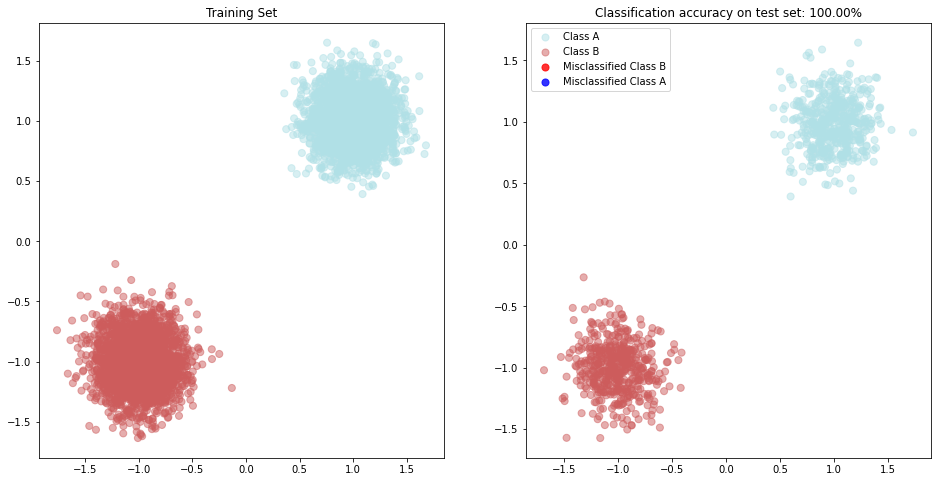

In [3]:
x_train, y_train = generate_data_lin(N=5000)
x_pred, y_true = generate_data_lin(N=1000)

data['x_train'] = x_train.astype('float32')
data['y_train'] = y_train.astype('float32')
data['x_pred'] = x_pred.astype('float32')
data['y_true'] = y_true.astype('float32')

linear_SVM(data)

## Question 3

Linear SVM performs poorly on these datasets, with accuracy around 50%. This is because in 2D, linear SVM can only use a line as decision boundary, which cannot separate these two datasets well

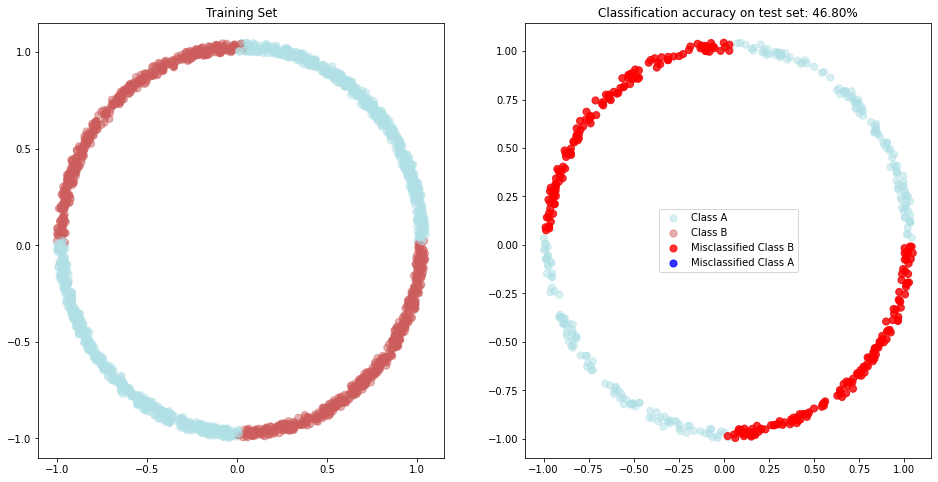

In [4]:
x_train, y_train = generate_data_basis("circle", 0.05, N=2000)
x_pred, y_true = generate_data_basis("circle", 0.05, N=500)

data['x_train'] = x_train.astype('float32')
data['y_train'] = y_train.astype('float32')
data['x_pred'] = x_pred.astype('float32')
data['y_true'] = y_true.astype('float32')

linear_SVM(data)

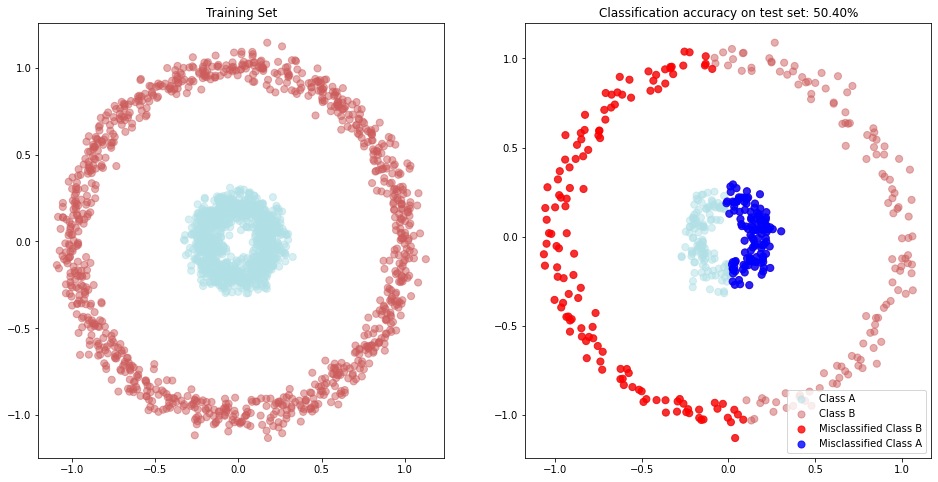

In [5]:
x_train, y_train = generate_data_basis("inner_circle", 0.05, N=2000)
x_pred, y_true = generate_data_basis("inner_circle", 0.05, N=500)

data['x_train'] = x_train.astype('float32')
data['y_train'] = y_train.astype('float32')
data['x_pred'] = x_pred.astype('float32')
data['y_true'] = y_true.astype('float32')

linear_SVM(data)

## Question 4

In [6]:
def circle_feature_linear_SVM(data):

    def circle_feature(x):
        # transform the raw input into linearly-separable feature(s)
        # input shape is (num_samples, 2), output shape should be (num_samples, num_features)
        # this should only take a couple lines
        return np.expand_dims(x[:, 0] * x[:, 1], axis=1)

    # 1. Create an instance of SVM with linear kernel, name it clf
    # 2. Compute features for x_train and x_pred using circle_feature, don't modify what's in data
    # 3. Train the SVM with features of x_train and y_train
    # 4. Make prediction y_pred, for features of x_pred with the trained model
    clf = svm.LinearSVC()
    clf.fit(circle_feature(data["x_train"]), data["y_train"])
    y_pred = clf.predict(circle_feature(data["x_pred"]))

    plot_data_decision_function(data, y_pred, clf, circle_feature)


def inner_circle_feature_linear_SVM(data):

    def inner_circle_feature(x):
        # transform the raw input into linearly-separable feature(s)
        # input shape is (num_samples, 2), output shape should be (num_samples, num_features)
        # this should only take a couple lines
        return np.expand_dims(np.linalg.norm(x, axis=1), axis=1)

    # 1. Create an instance of SVM with linear kernel, name it clf
    # 2. Compute features for x_train and x_pred using inner_circle_feature, don't modify what's in data
    # 3. Train the SVM with features of x_train and y_train
    # 4. Make prediction y_pred, for features of x_pred with the trained model
    clf = svm.LinearSVC()
    clf.fit(inner_circle_feature(data["x_train"]), data["y_train"])
    y_pred = clf.predict(inner_circle_feature(data["x_pred"]))

    plot_data_decision_function(data, y_pred, clf, inner_circle_feature)

## Question 5

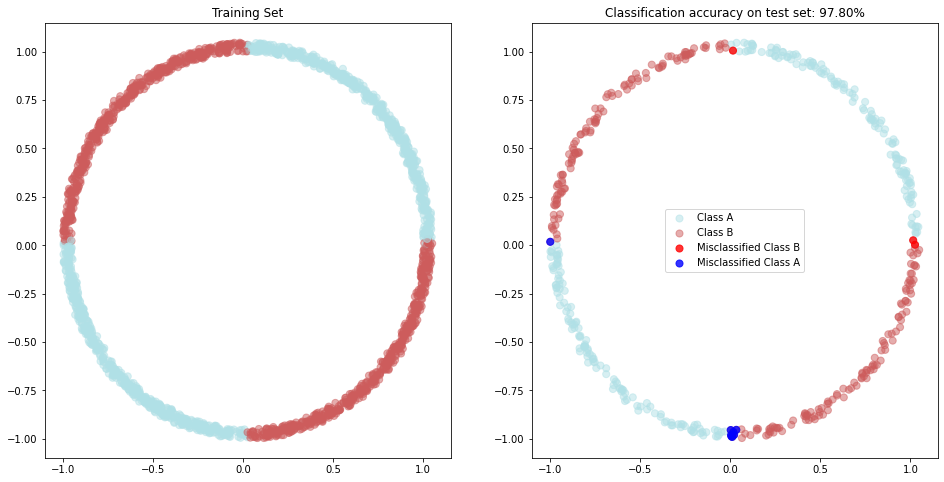

In [7]:
x_train, y_train = generate_data_basis("circle", 0.05, N=2000)
x_pred, y_true = generate_data_basis("circle", 0.05, N=500)

data['x_train'] = x_train.astype('float32')
data['y_train'] = y_train.astype('float32')
data['x_pred'] = x_pred.astype('float32')
data['y_true'] = y_true.astype('float32')

circle_feature_linear_SVM(data)

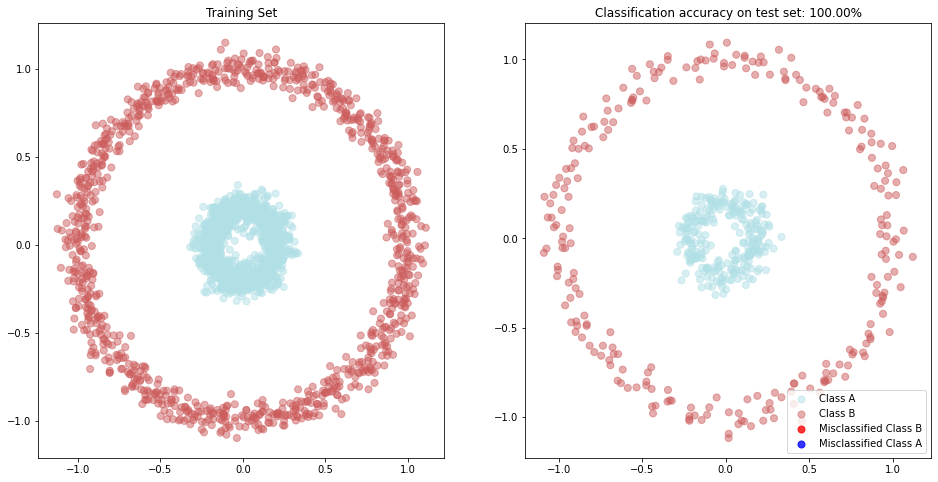

In [8]:
x_train, y_train = generate_data_basis("inner_circle", 0.05, N=2000)
x_pred, y_true = generate_data_basis("inner_circle", 0.05, N=500)

data['x_train'] = x_train.astype('float32')
data['y_train'] = y_train.astype('float32')
data['x_pred'] = x_pred.astype('float32')
data['y_true'] = y_true.astype('float32')

inner_circle_feature_linear_SVM(data)

## Question 6
We mapped the data into feature spaces with non-linear transformations, and used linear SVM to find linear decision boundarires in the feature spaces, which correspond to non-linear decision boundaries in the original data coordinate.

## Question 7

In [9]:
def rbf_SVM(data):
    # 1. Create an instance of SVM with RBF kernel, name it clf
    # 2. Train the SVM with x_train and y_train in data
    # 3. Make prediction y_pred, for x_pred with the trained model
    clf = svm.SVC(C=1)
    clf.fit(data["x_train"], data["y_train"])
    y_pred = clf.predict(data["x_pred"])

    plot_data_decision_function(data, y_pred, clf)

## Question 8

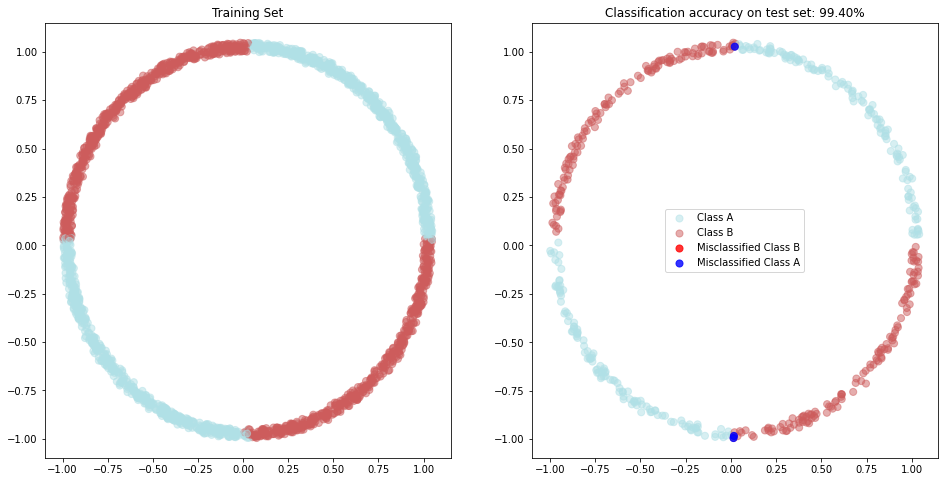

In [10]:
x_train, y_train = generate_data_basis("circle", 0.05, N=2000)
x_pred, y_true = generate_data_basis("circle", 0.05, N=500)

data['x_train'] = x_train.astype('float32')
data['y_train'] = y_train.astype('float32')
data['x_pred'] = x_pred.astype('float32')
data['y_true'] = y_true.astype('float32')


rbf_SVM(data)

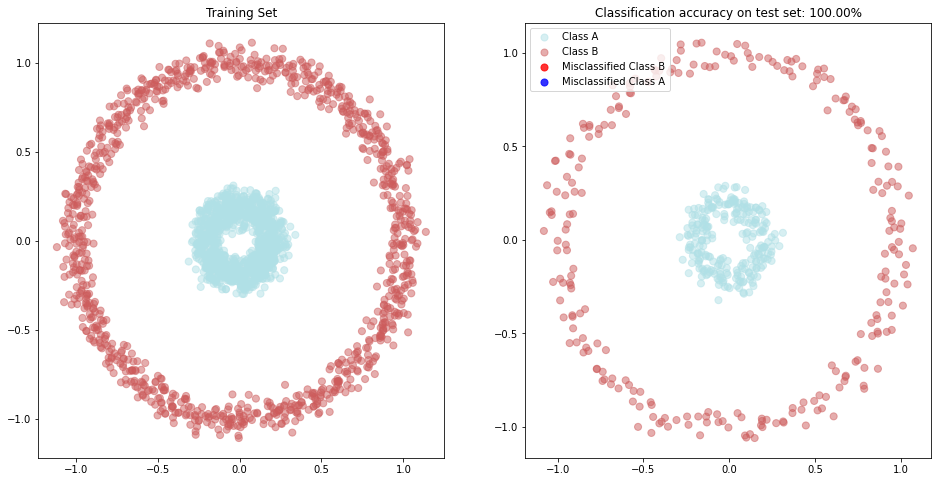

In [11]:
x_train, y_train = generate_data_basis("inner_circle", 0.05, N=2000)
x_pred, y_true = generate_data_basis("inner_circle", 0.05, N=500)

data['x_train'] = x_train.astype('float32')
data['y_train'] = y_train.astype('float32')
data['x_pred'] = x_pred.astype('float32')
data['y_true'] = y_true.astype('float32')

rbf_SVM(data)

## Question 9

In [13]:
def cross_validation_tune_C(data):
    # 1. Sweep through some values of C, create a SVM with RBF kernel for each C
    # 2. Use the cross_val_score function to perform cross validation, use cv=5 (default)
    # 3. Find the value of C that gives the best mean accuracy
    mean_acc = []
    C_range = np.logspace(-3, 3, 7)
    for C in C_range:
        clf = svm.SVC(C=C )
        scores = cross_val_score(clf, data['x_train'], data['y_train'], cv=5)
        mean_acc.append(np.mean(scores))
    plt.plot(C_range, mean_acc)
    idx = np.argmax(mean_acc)
    print("Best C: {}, best accuracy: {}".format(C_range[idx], mean_acc[idx]))

## Question 10

Best C: 10.0, best accuracy: 0.8700000000000001


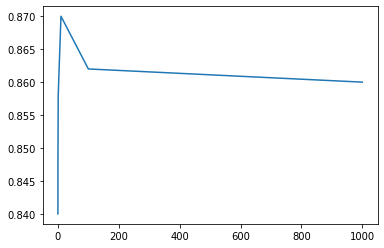

In [14]:
x_train, y_train, x_pred, y_true = generate_data_moons(0.4)

data['x_train'] = x_train.astype('float32')
data['y_train'] = y_train.astype('float32')
data['x_pred'] = x_pred.astype('float32')
data['y_true'] = y_true.astype('float32')

cross_validation_tune_C(data)

Mean accuracy peaks at the optimal value and decreases when C moves away from the optimal value in both direction. At small C, this corresponds to underfitting; and at large C, this corresponds to overfitting.

## Question 11

In [22]:
def cross_validation_tune_gamma(data):
    # 1. Sweep through some values of gamma, create a SVM with RBF kernel for each gamma, using your optimal C
    # 2. Use the cross_val_score function to perform cross validation, use cv=5 (default)
    # 3. Find the value of gamma that gives the best mean accuracy
    mean_acc = []
    g_range = np.linspace(.1, 5, 50)
    for gamma in g_range:
        clf = svm.SVC(gamma=gamma, C=10)
        scores = cross_val_score(clf, data['x_train'], data['y_train'], cv=5)
        mean_acc.append(np.mean(scores))
    plt.plot(g_range, mean_acc)
    idx = np.argmax(mean_acc)
    print("Best Gamma: {}, best accuracy: {}".format(g_range[idx], mean_acc[idx]))

## Question 12

Best Gamma: 0.7000000000000001, best accuracy: 0.8700000000000001


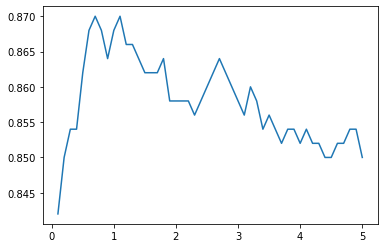

In [23]:
x_train, y_train, x_pred, y_true = generate_data_moons(0.4)

data['x_train'] = x_train.astype('float32')
data['y_train'] = y_train.astype('float32')
data['x_pred'] = x_pred.astype('float32')
data['y_true'] = y_true.astype('float32')

cross_validation_tune_gamma(data)

Similar to when we vary C, mean accuracy peaks at the optimal gamma and generally decreases when gamma moves away from the optimal value in both direction. Recall gamma controls the extent of influence of each data points. Similarly, worse performance at large and small gamma correspond to overfitting and underfitting.